Random forest is an excellent technique that uses an ensemble learning method for both classification and regression with trees in the random forest running in parallel (Implementing Random Forest Regression in Python: An Introduction | Built In, n.d.) This means there is no interaction between the trees while building the trees. Ensemble methods combine several models to produce one with higher accuracy (Ensemble Methods in Machine Learning: What Are They and Why Use Them? | by Evan Lutins | Towards Data Science, n.d.). It is for this reason that the random forest classifier is chosen. We could apply multiple datasets to the random forest program, which predicted much greater than the artificial nerual network in python. 

In [71]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [72]:
data=pd.read_csv('/Users/Albert3/Downloads/M_LUAD_cancer_expression.csv')
df=data[['Drug Name','Cell Line Name','Tissue','Tissue Sub-type','IC50']]
df

/var/folders/d9/f8xx3ggn7y5f7tr2jyd4nkk80000gp/T/ipykernel_74661/742776680.py:1: DtypeWarning: Columns (8003) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/Users/Albert3/Downloads/M_LUAD_cancer_expression.csv')


,Drug Name,Cell Line Name,Tissue,Tissue Sub-type,IC50
0,Erlotinib,NCI-H1648,lung,lung_NSCLC_adenocarcinoma,-3.130315
1,Erlotinib,NCI-H1650,lung,lung_NSCLC_adenocarcinoma,3.661843
2,Erlotinib,NCI-H1838,lung,lung_NSCLC_adenocarcinoma,2.322838
3,Erlotinib,Calu-6,lung,lung_NSCLC_adenocarcinoma,3.009075
4,Erlotinib,NCI-H1355,lung,lung_NSCLC_adenocarcinoma,0.954770
...,...,...,...,...,...
37299,N-acetyl cysteine,NCI-H1435,lung,lung_NSCLC_adenocarcinoma,8.507421
37300,N-acetyl cysteine,NCI-H1568,lung,lung_NSCLC_adenocarcinoma,11.118324
37301,N-acetyl cysteine,NCI-H1781,lung,lung_NSCLC_adenocarcinoma,10.132069
37302,N-acetyl cysteine,RERF-LC-KJ,lung,lung_NSCLC_adenocarcinoma,8.763763


In [74]:
encoder = LabelEncoder()
dframe=pd.DataFrame()
dframe["Drug Name"] = encoder.fit_transform(df["Drug Name"])
dframe["Cell Line Name"] = encoder.fit_transform(df["Cell Line Name"])
dframe["Tissue"] = encoder.fit_transform(df["Tissue"])
dframe["Tissue Sub-type"] = encoder.fit_transform(df["Tissue Sub-type"])
dframe['IC50']=df['IC50']
dframe

,Drug Name,Cell Line Name,Tissue,Tissue Sub-type,IC50
0,183,22,0,0,-3.130315
1,183,23,0,0,3.661843
2,183,32,0,0,2.322838
3,183,4,0,0,3.009075
4,183,15,0,0,0.954770
...,...,...,...,...,...
37299,323,16,0,0,8.507421
37300,323,19,0,0,11.118324
37301,323,29,0,0,10.132069
37302,323,57,0,0,8.763763


In [75]:
# get the correlation matrix
dframe.corr()

,Drug Name,Cell Line Name,Tissue,Tissue Sub-type,IC50
Drug Name,1.000000,0.000661,NaN,NaN,0.022032
Cell Line Name,0.000661,1.000000,NaN,NaN,0.039694
Tissue,NaN,NaN,NaN,NaN,NaN
Tissue Sub-type,NaN,NaN,NaN,NaN,NaN
IC50,0.022032,0.039694,NaN,NaN,1.000000


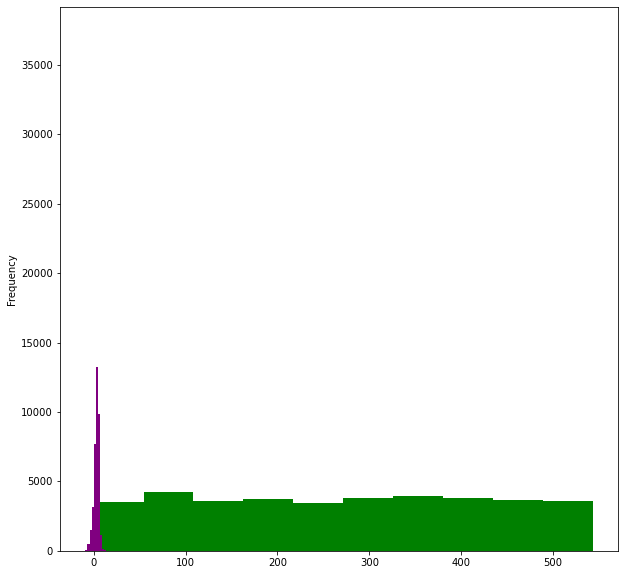

In [76]:
#plot histogram for the data
plt.figure(figsize=(10,10))
dframe['Drug Name'].plot(kind='hist',color="green")
dframe['Tissue'].plot(kind='hist',color="yellow")
dframe['Tissue Sub-type'].plot(kind='hist',color="orange")
dframe['IC50'].plot(kind='hist',color='purple')
dframe['Cell Line Name'].plot

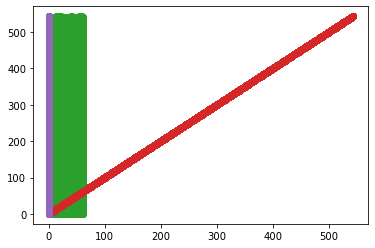

In [77]:
# plot a scatter plot
import matplotlib.pyplot as plt

plt.scatter(x=dframe['Tissue Sub-type'],y=dframe['Drug Name'])
plt.scatter(x=dframe['Tissue'],y=dframe['Drug Name'])
plt.scatter(x=dframe['Cell Line Name'],y=dframe['Drug Name'])
plt.scatter(x=dframe['Drug Name'],y=dframe['Drug Name'])
plt.scatter(x=dframe['Tissue Sub-type'],y=dframe['Drug Name'])



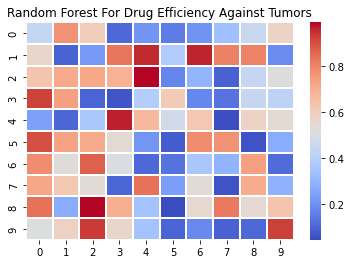

In [78]:
#plot a heatmap

dataframe= np.random.rand( 10 , 10 )
ax = sns.heatmap( dataframe , linewidth = 1.5 , cmap = 'coolwarm' )
  
plt.title( "Random Forest For Drug Efficiency Against Tumors" )
plt.show()


In [79]:
#X and Y
X=dframe[['Cell Line Name','Tissue','Tissue Sub-type','IC50']]
Y=dframe[['Drug Name']]

In [80]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.45660762,  0.        ,  0.        , -2.22711287],
       [-0.40068192,  0.        ,  0.        ,  0.31373664],
       [ 0.10264939,  0.        ,  0.        , -0.18716609],
       ...,
       [-0.06512772,  0.        ,  0.        ,  2.7341564 ],
       [ 1.50079191,  0.        ,  0.        ,  2.22229235],
       [-1.29549313,  0.        ,  0.        ,  2.88671701]])

In [81]:
#Split the dataset
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size = 0.1, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (33573, 4), (33573, 1)
Test: (3731, 4), (3731, 1)


In [82]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X, Y)

/var/folders/d9/f8xx3ggn7y5f7tr2jyd4nkk80000gp/T/ipykernel_74661/638098497.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, Y)


RandomForestClassifier(random_state=18)

In [83]:
preds = rf_model.predict(X_test)
preds

array([420, 194, 533, ..., 164, 490,  72])

In [84]:
#predict a specific value
scaled_x=scaler.transform([[203,4,50,10.541691]])
scaled_x

/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 9.66594423,  4.        , 50.        ,  2.88738999]])

In [86]:
predicted=rf_model.predict([scaled_x[0]])

In [87]:
predicted

array([323])

In [88]:
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

Accuracy on train data by Random Forest Classifier: 99.11536055759093


In [89]:
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on test data by Random Forest Classifier: 99.03511123023318


In [90]:
#Save the classifier
import joblib
joblib.dump(rf_model,'/Users/Albert3/Downloads/M_luad.joblib',compress=5)


['/Users/Albert3/Downloads/M_luad.joblib']

In [91]:
model=joblib.load('/Users/Albert3/Downloads/M_luad.joblib')

In [92]:
tframe=df.join(dframe,rsuffix='enc')
tframe

,Drug Name,Cell Line Name,Tissue,Tissue Sub-type,IC50,Drug Nameenc,Cell Line Nameenc,Tissueenc,Tissue Sub-typeenc,IC50enc
0,Erlotinib,NCI-H1648,lung,lung_NSCLC_adenocarcinoma,-3.130315,183,22,0,0,-3.130315
1,Erlotinib,NCI-H1650,lung,lung_NSCLC_adenocarcinoma,3.661843,183,23,0,0,3.661843
2,Erlotinib,NCI-H1838,lung,lung_NSCLC_adenocarcinoma,2.322838,183,32,0,0,2.322838
3,Erlotinib,Calu-6,lung,lung_NSCLC_adenocarcinoma,3.009075,183,4,0,0,3.009075
4,Erlotinib,NCI-H1355,lung,lung_NSCLC_adenocarcinoma,0.954770,183,15,0,0,0.954770
...,...,...,...,...,...,...,...,...,...,...
37299,N-acetyl cysteine,NCI-H1435,lung,lung_NSCLC_adenocarcinoma,8.507421,323,16,0,0,8.507421
37300,N-acetyl cysteine,NCI-H1568,lung,lung_NSCLC_adenocarcinoma,11.118324,323,19,0,0,11.118324
37301,N-acetyl cysteine,NCI-H1781,lung,lung_NSCLC_adenocarcinoma,10.132069,323,29,0,0,10.132069
37302,N-acetyl cysteine,RERF-LC-KJ,lung,lung_NSCLC_adenocarcinoma,8.763763,323,57,0,0,8.763763


In [94]:
#predict actual values
cln='Calu-6'
tis='lung'
subt='lung_NSCLC_adenocarcinoma'
i50=3.009075
test=pd.DataFrame()
test['clnenc']=tframe['Cell Line Nameenc'].where((tframe['Cell Line Name']==cln))
test['tis']=tframe['Tissueenc'].where((tframe['Tissue']==tis))
test['subt']=tframe['Tissue Sub-typeenc'].where((tframe['Tissue Sub-type']==subt))
test['ic50']=3.009075
test.dropna(inplace=True)
x=np.array(test.iloc[0,0:])
x

array([4.      , 0.      , 0.      , 3.009075])

In [95]:
#scale the input values
scaled_x=scaler.transform([x])
scaled_x

/Users/Albert3/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.46327024,  0.        ,  0.        ,  0.06954556]])

In [96]:
#predict drug encode
drugenc=model.predict([scaled_x[0]])
drugenc[0]

183

In [97]:
#return the drugname
drugname=tframe['Drug Name'].where(tframe['Drug Nameenc']==drugenc[0])
drugname.dropna(inplace=True)
drugname.iloc[0]

'Erlotinib'